In [1]:
from pymab.policies.ucb import DiscountedUCBPolicy, SlidingWindowUCBPolicy, StationaryUCBPolicy
from pymab.game import Game

In [2]:
n_bandits = 10

In [3]:
ucb_stationary_policy = StationaryUCBPolicy(
    n_bandits=10,
    c=1,
)

ucb_sliding_window_policy = SlidingWindowUCBPolicy(
    n_bandits=10,
    c=1,
    window_size=100,
)

ucb_discounted_policy = DiscountedUCBPolicy(
    n_bandits=10,
    c=1,
    discount_factor=0.5,
)

In [4]:
non_stationary_game = Game(
    n_episodes=1000,
    n_steps=2000,
    policies=[ucb_stationary_policy, ucb_sliding_window_policy, ucb_discounted_policy],
    n_bandits=10,
    is_stationary=False,
    # change_frequency=100,
    # change_magnitude=0.1
    change_frequency=100,
    change_magnitude=0.5
)

In [5]:
# Run the game
non_stationary_game.game_loop()

Q_values updated [-0.63030069  3.31980488  0.92396903 -0.62570002 -2.4445683   0.12645126
  0.7999542  -0.84789194  1.46415187  0.05410877]
Q_values updated [ 0.14306722  3.44340526  0.42195423 -0.96250206 -2.62427899  0.6011261
  0.4791169  -0.010531    0.75376735 -0.22258464]
Q_values updated [ 0.58232723  3.87539421  0.22037712 -1.38793672 -3.38458363 -0.08706959
  0.10714478  0.51210654  0.26044061  0.07731679]
Q_values updated [ 0.63702018  4.09011961  0.31721007 -0.92446376 -3.18811809 -0.08314604
  0.18358352  0.76054312  0.42848556  0.14305308]
Q_values updated [ 1.03617919  2.67689043  0.68674397 -0.60212794 -2.96805994 -0.5909874
  1.05483027  0.88446956  1.31324433  0.33268296]
Q_values updated [ 1.37589945  3.13308284  1.69777819  0.49544742 -2.72159413  0.11337486
 -0.24066355  1.37339286  1.5824666   0.43160439]
Q_values updated [ 1.55003188  3.66057332  1.73203848  0.68097467 -3.2080902   0.36439157
 -0.08521568  1.44044064  1.78620843  0.79472706]
Q_values updated [ 1.2

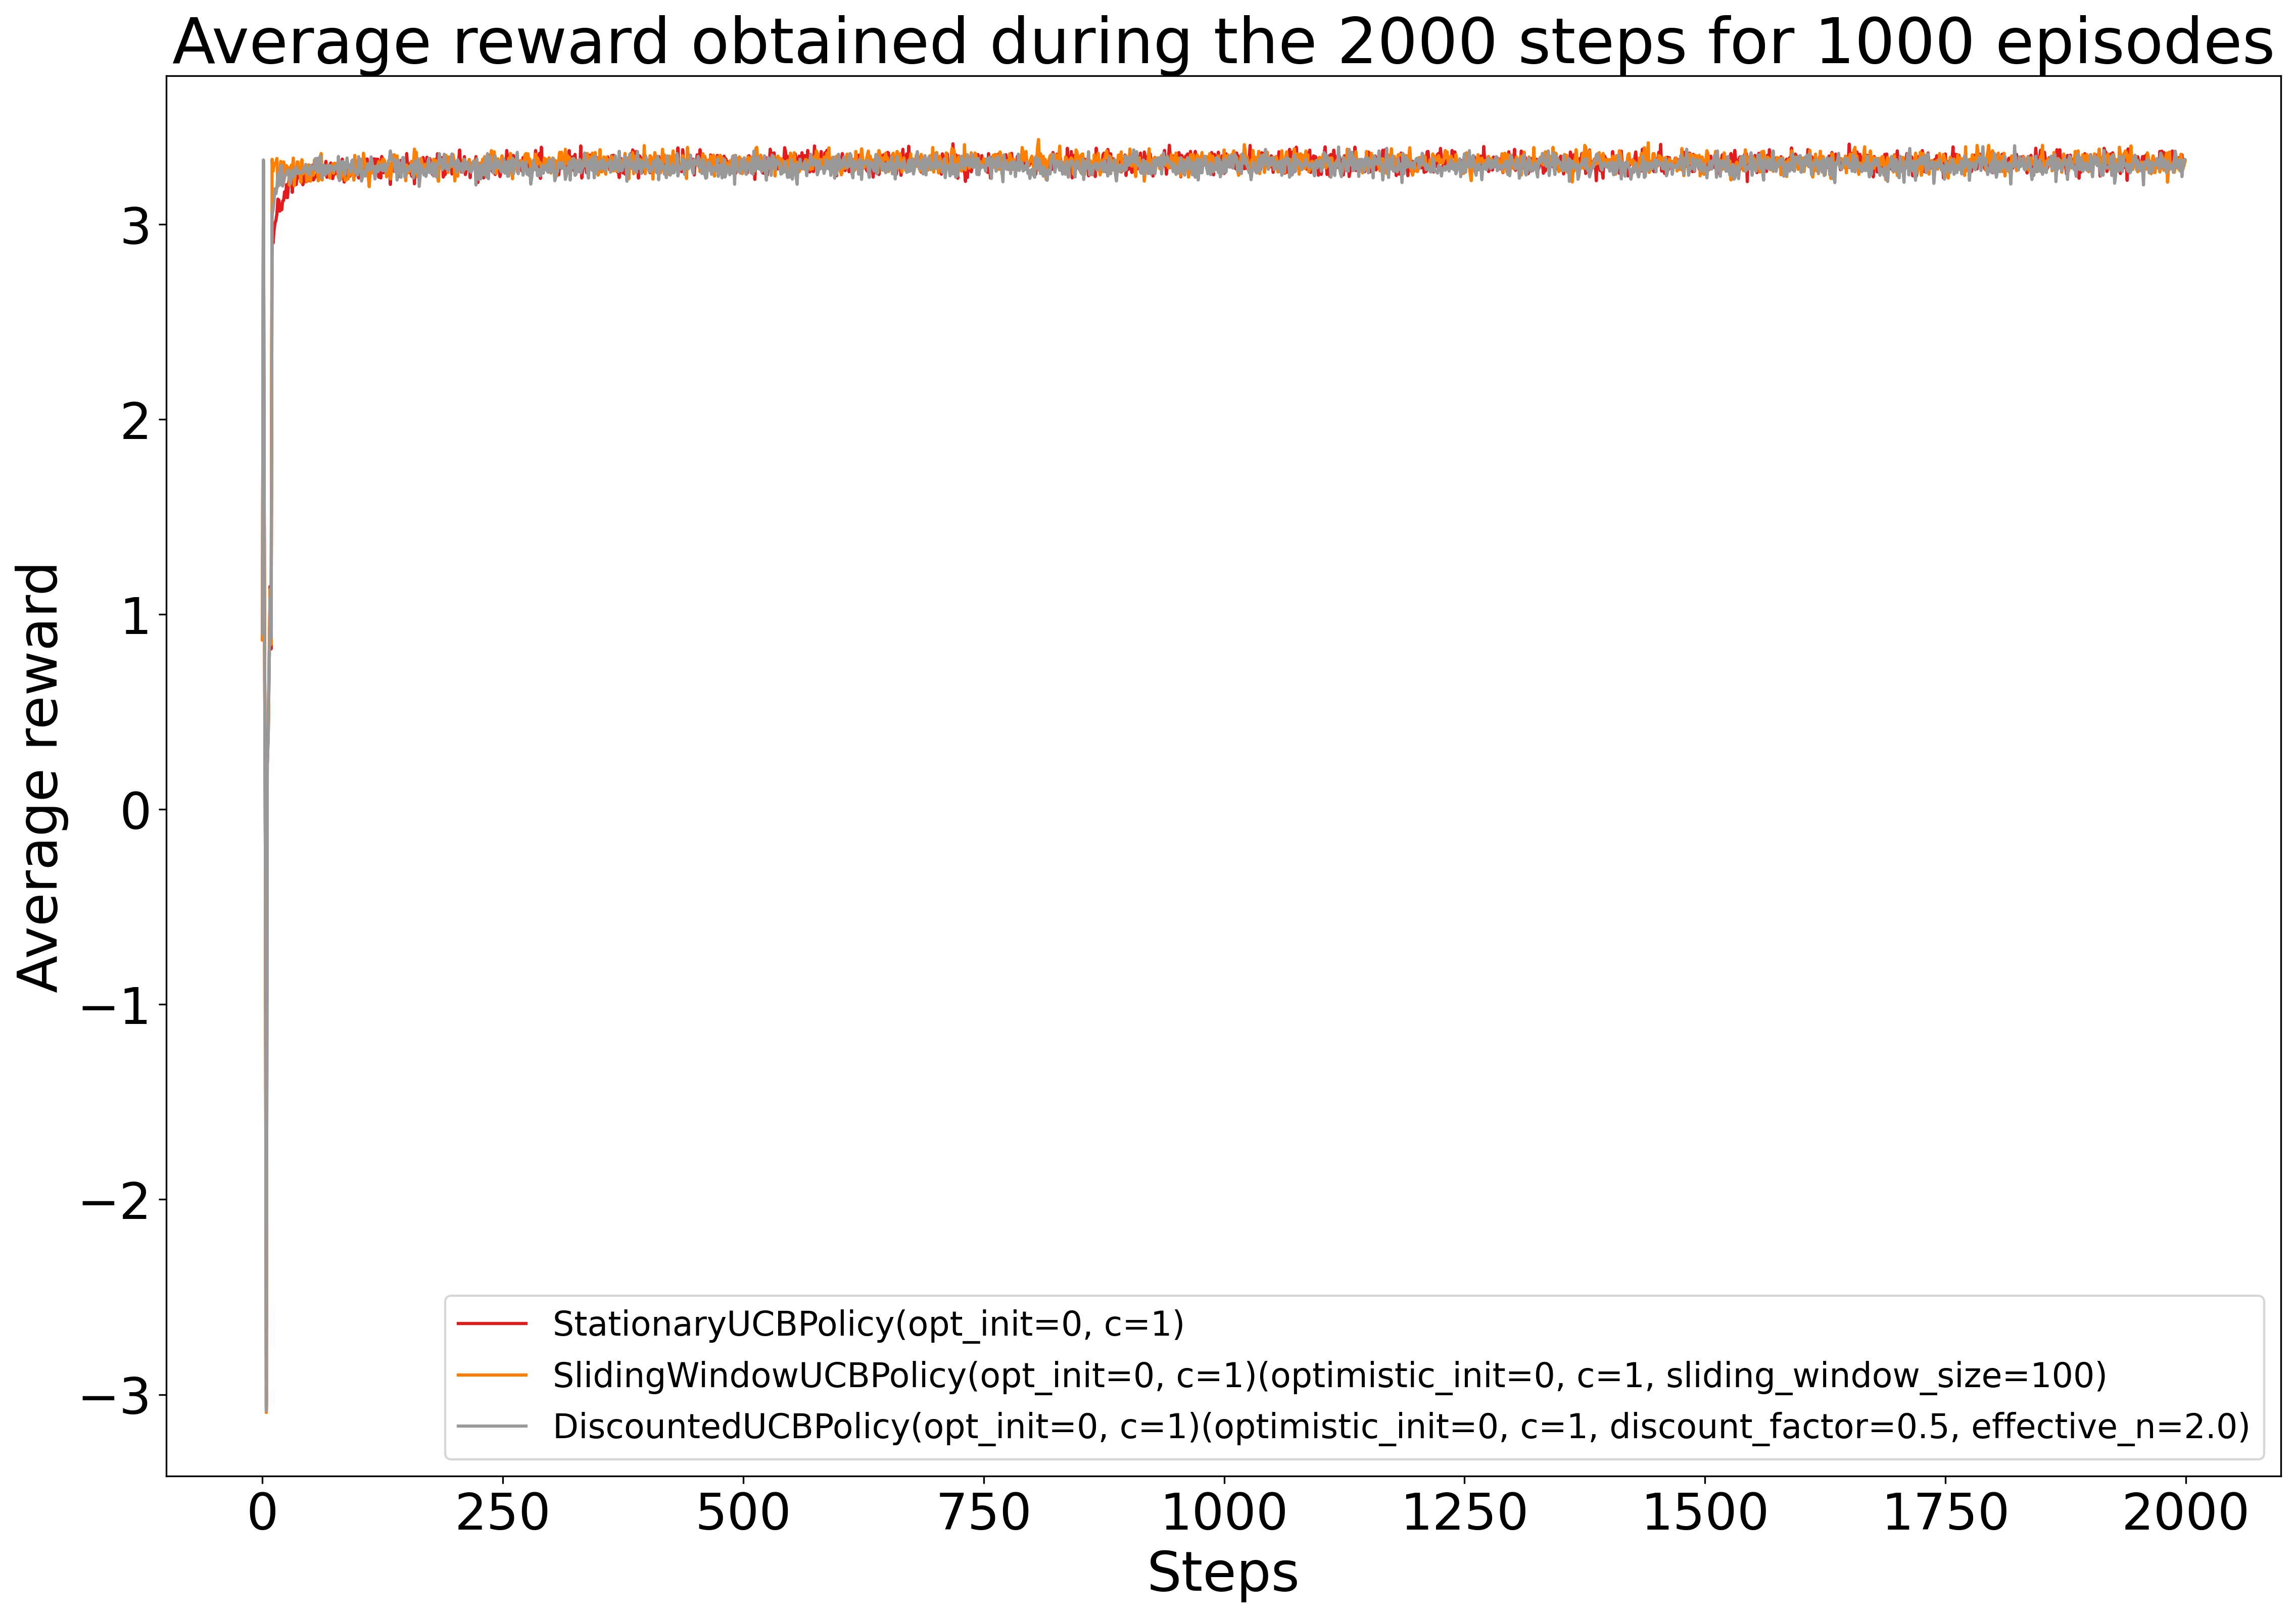

In [6]:
# Plot the results
non_stationary_game.plot_average_reward_by_step()

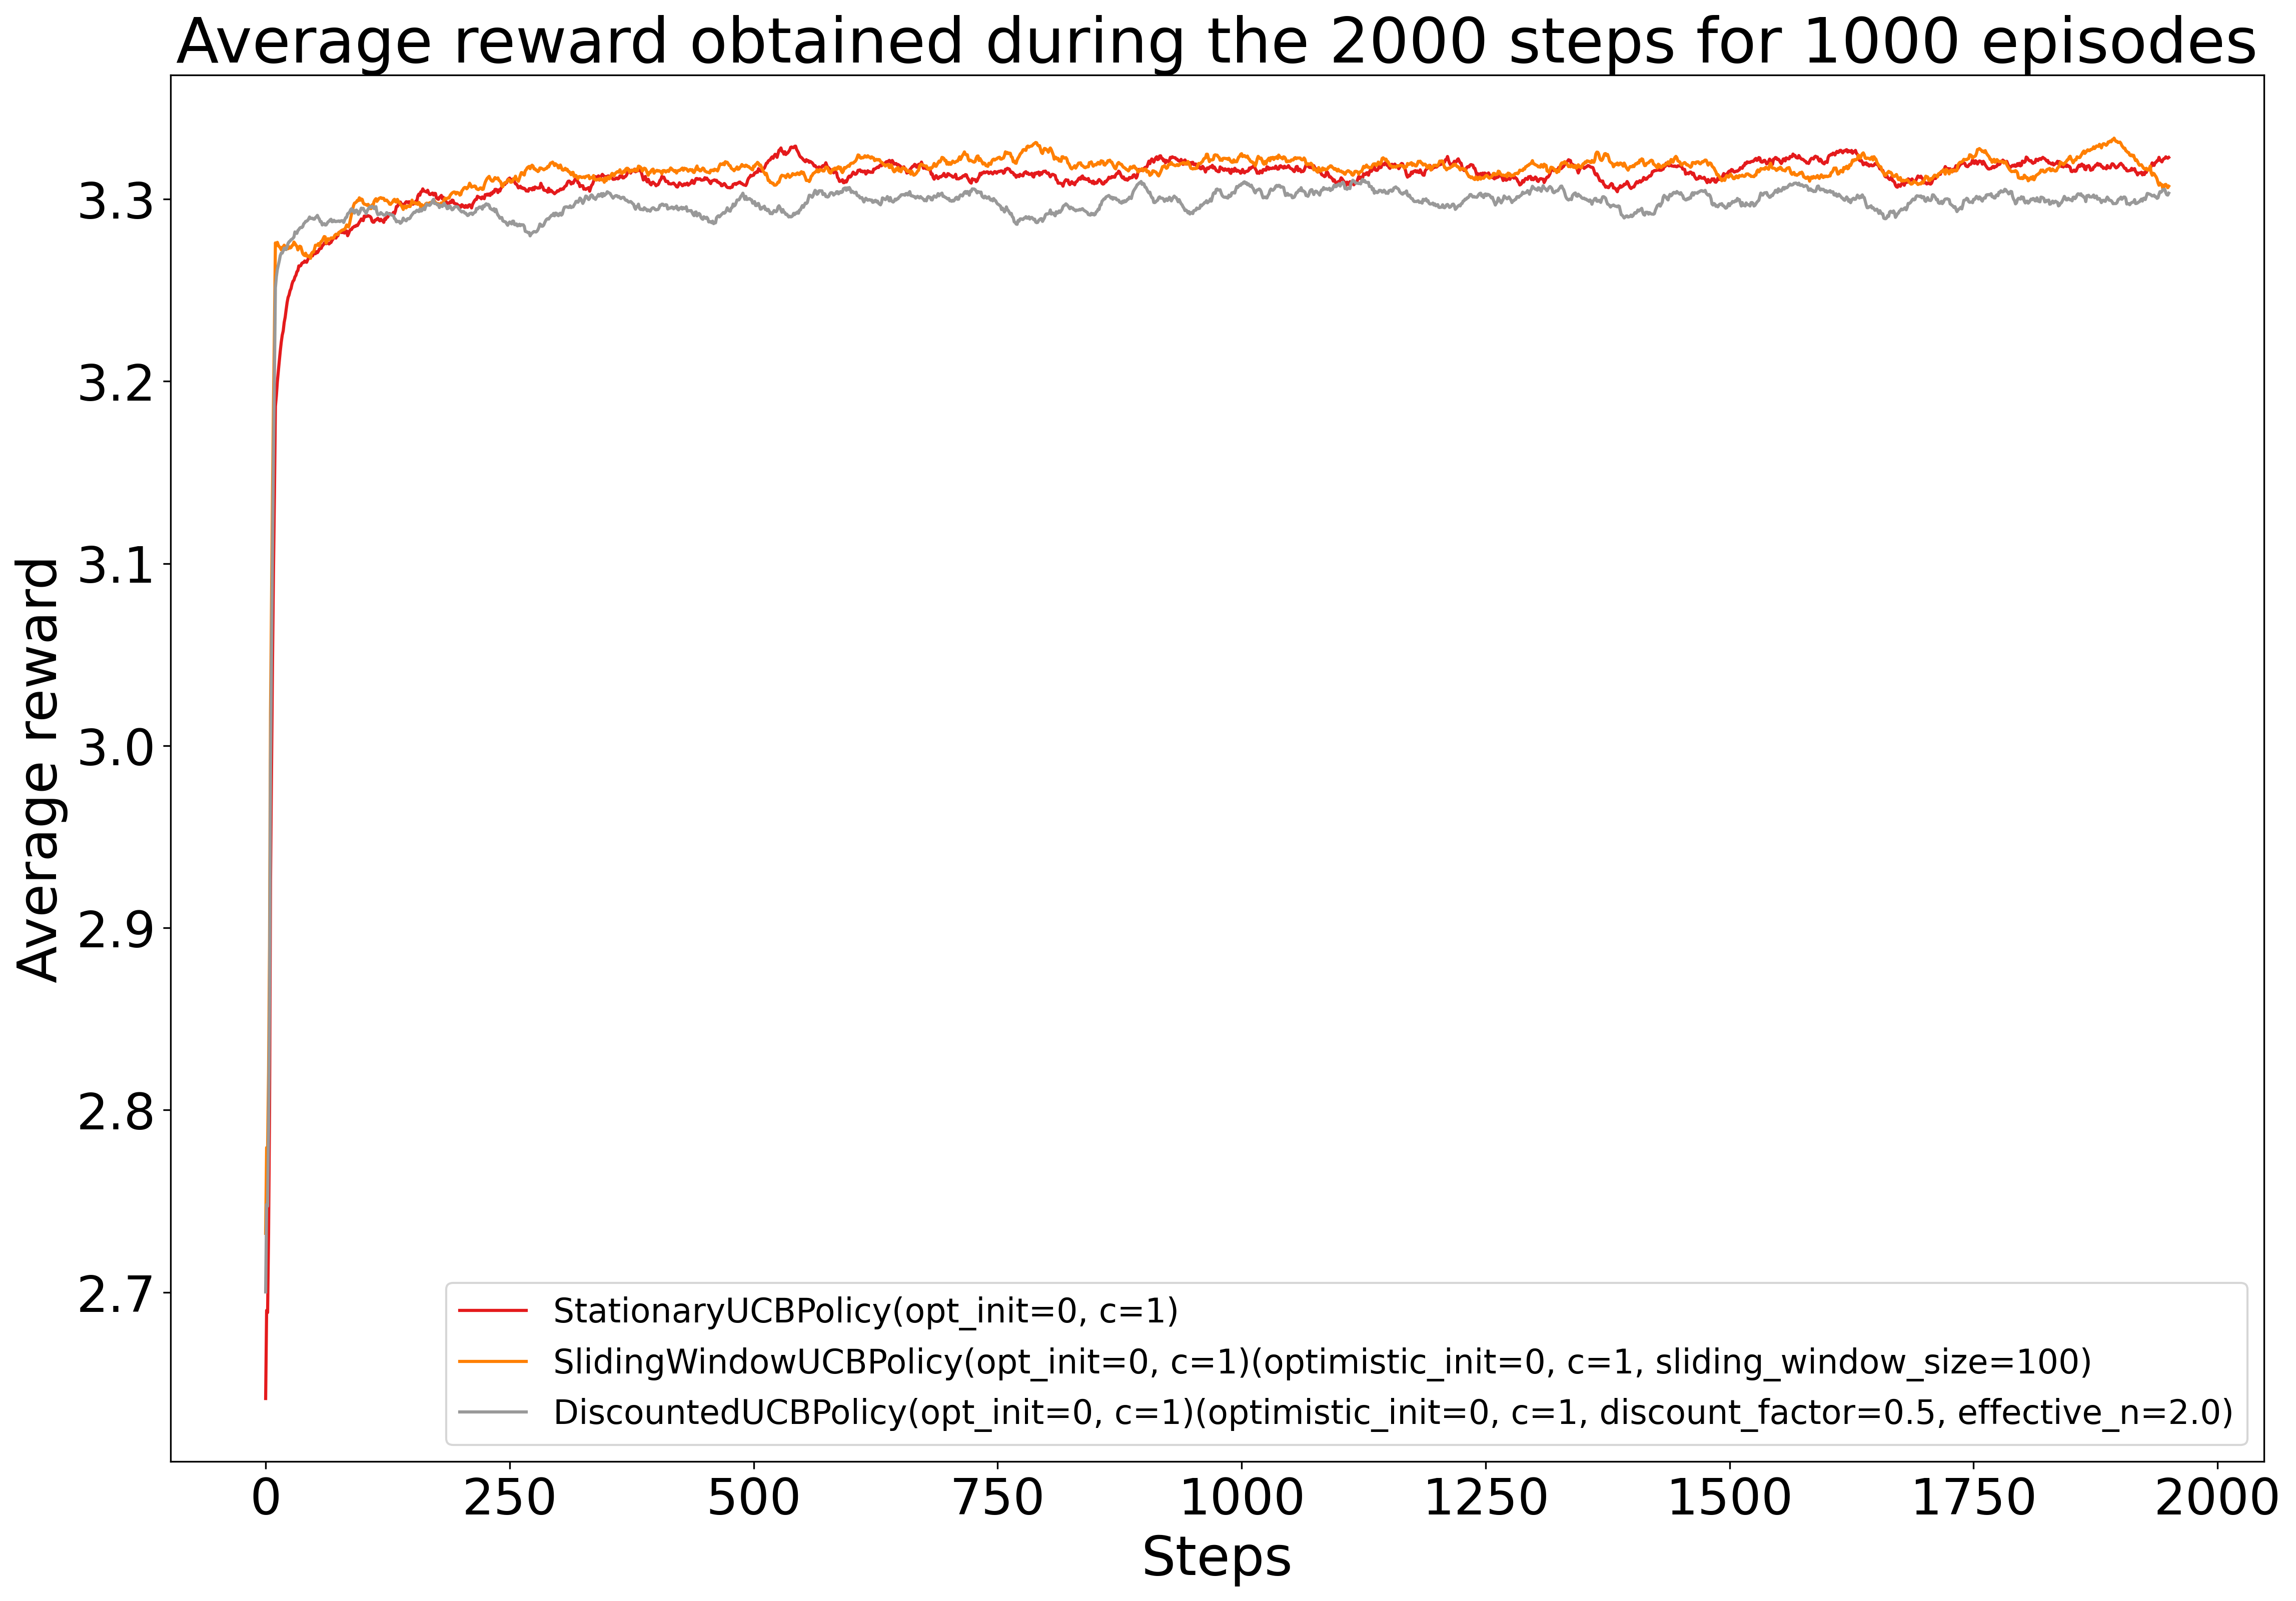

In [7]:
non_stationary_game.plot_average_reward_by_step_smoothed()

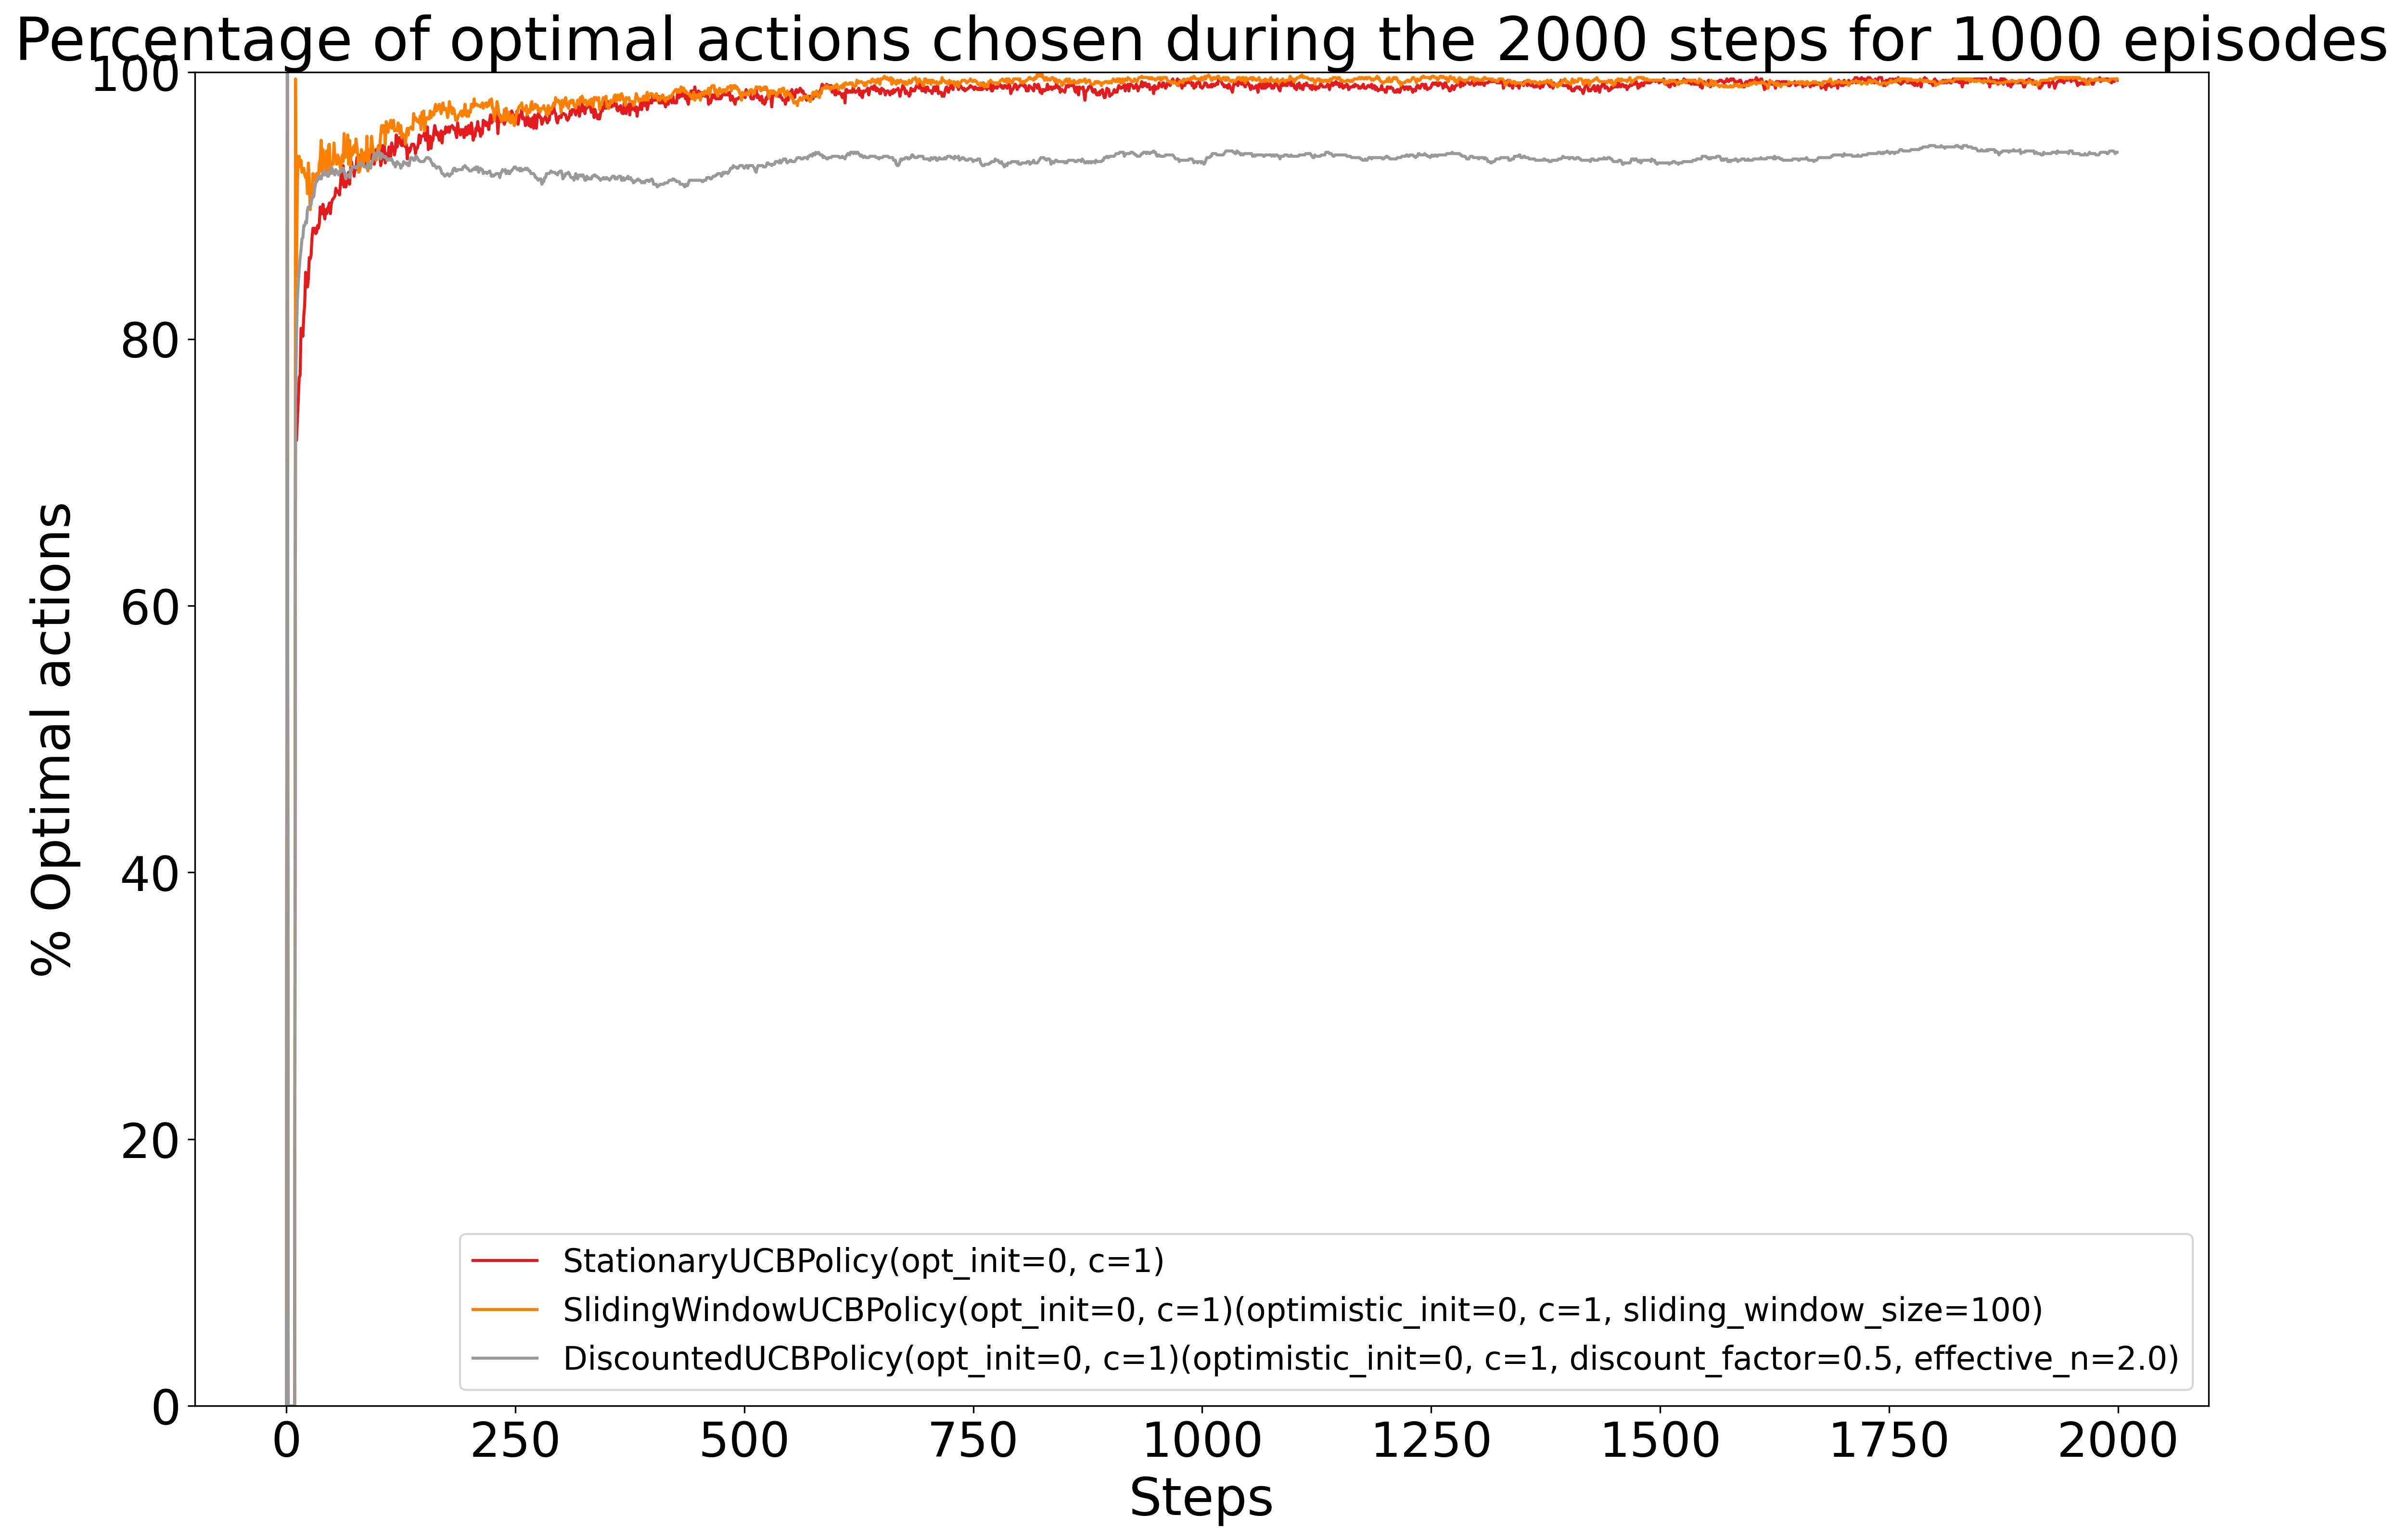

In [8]:
non_stationary_game.plot_rate_optimal_actions_by_step()

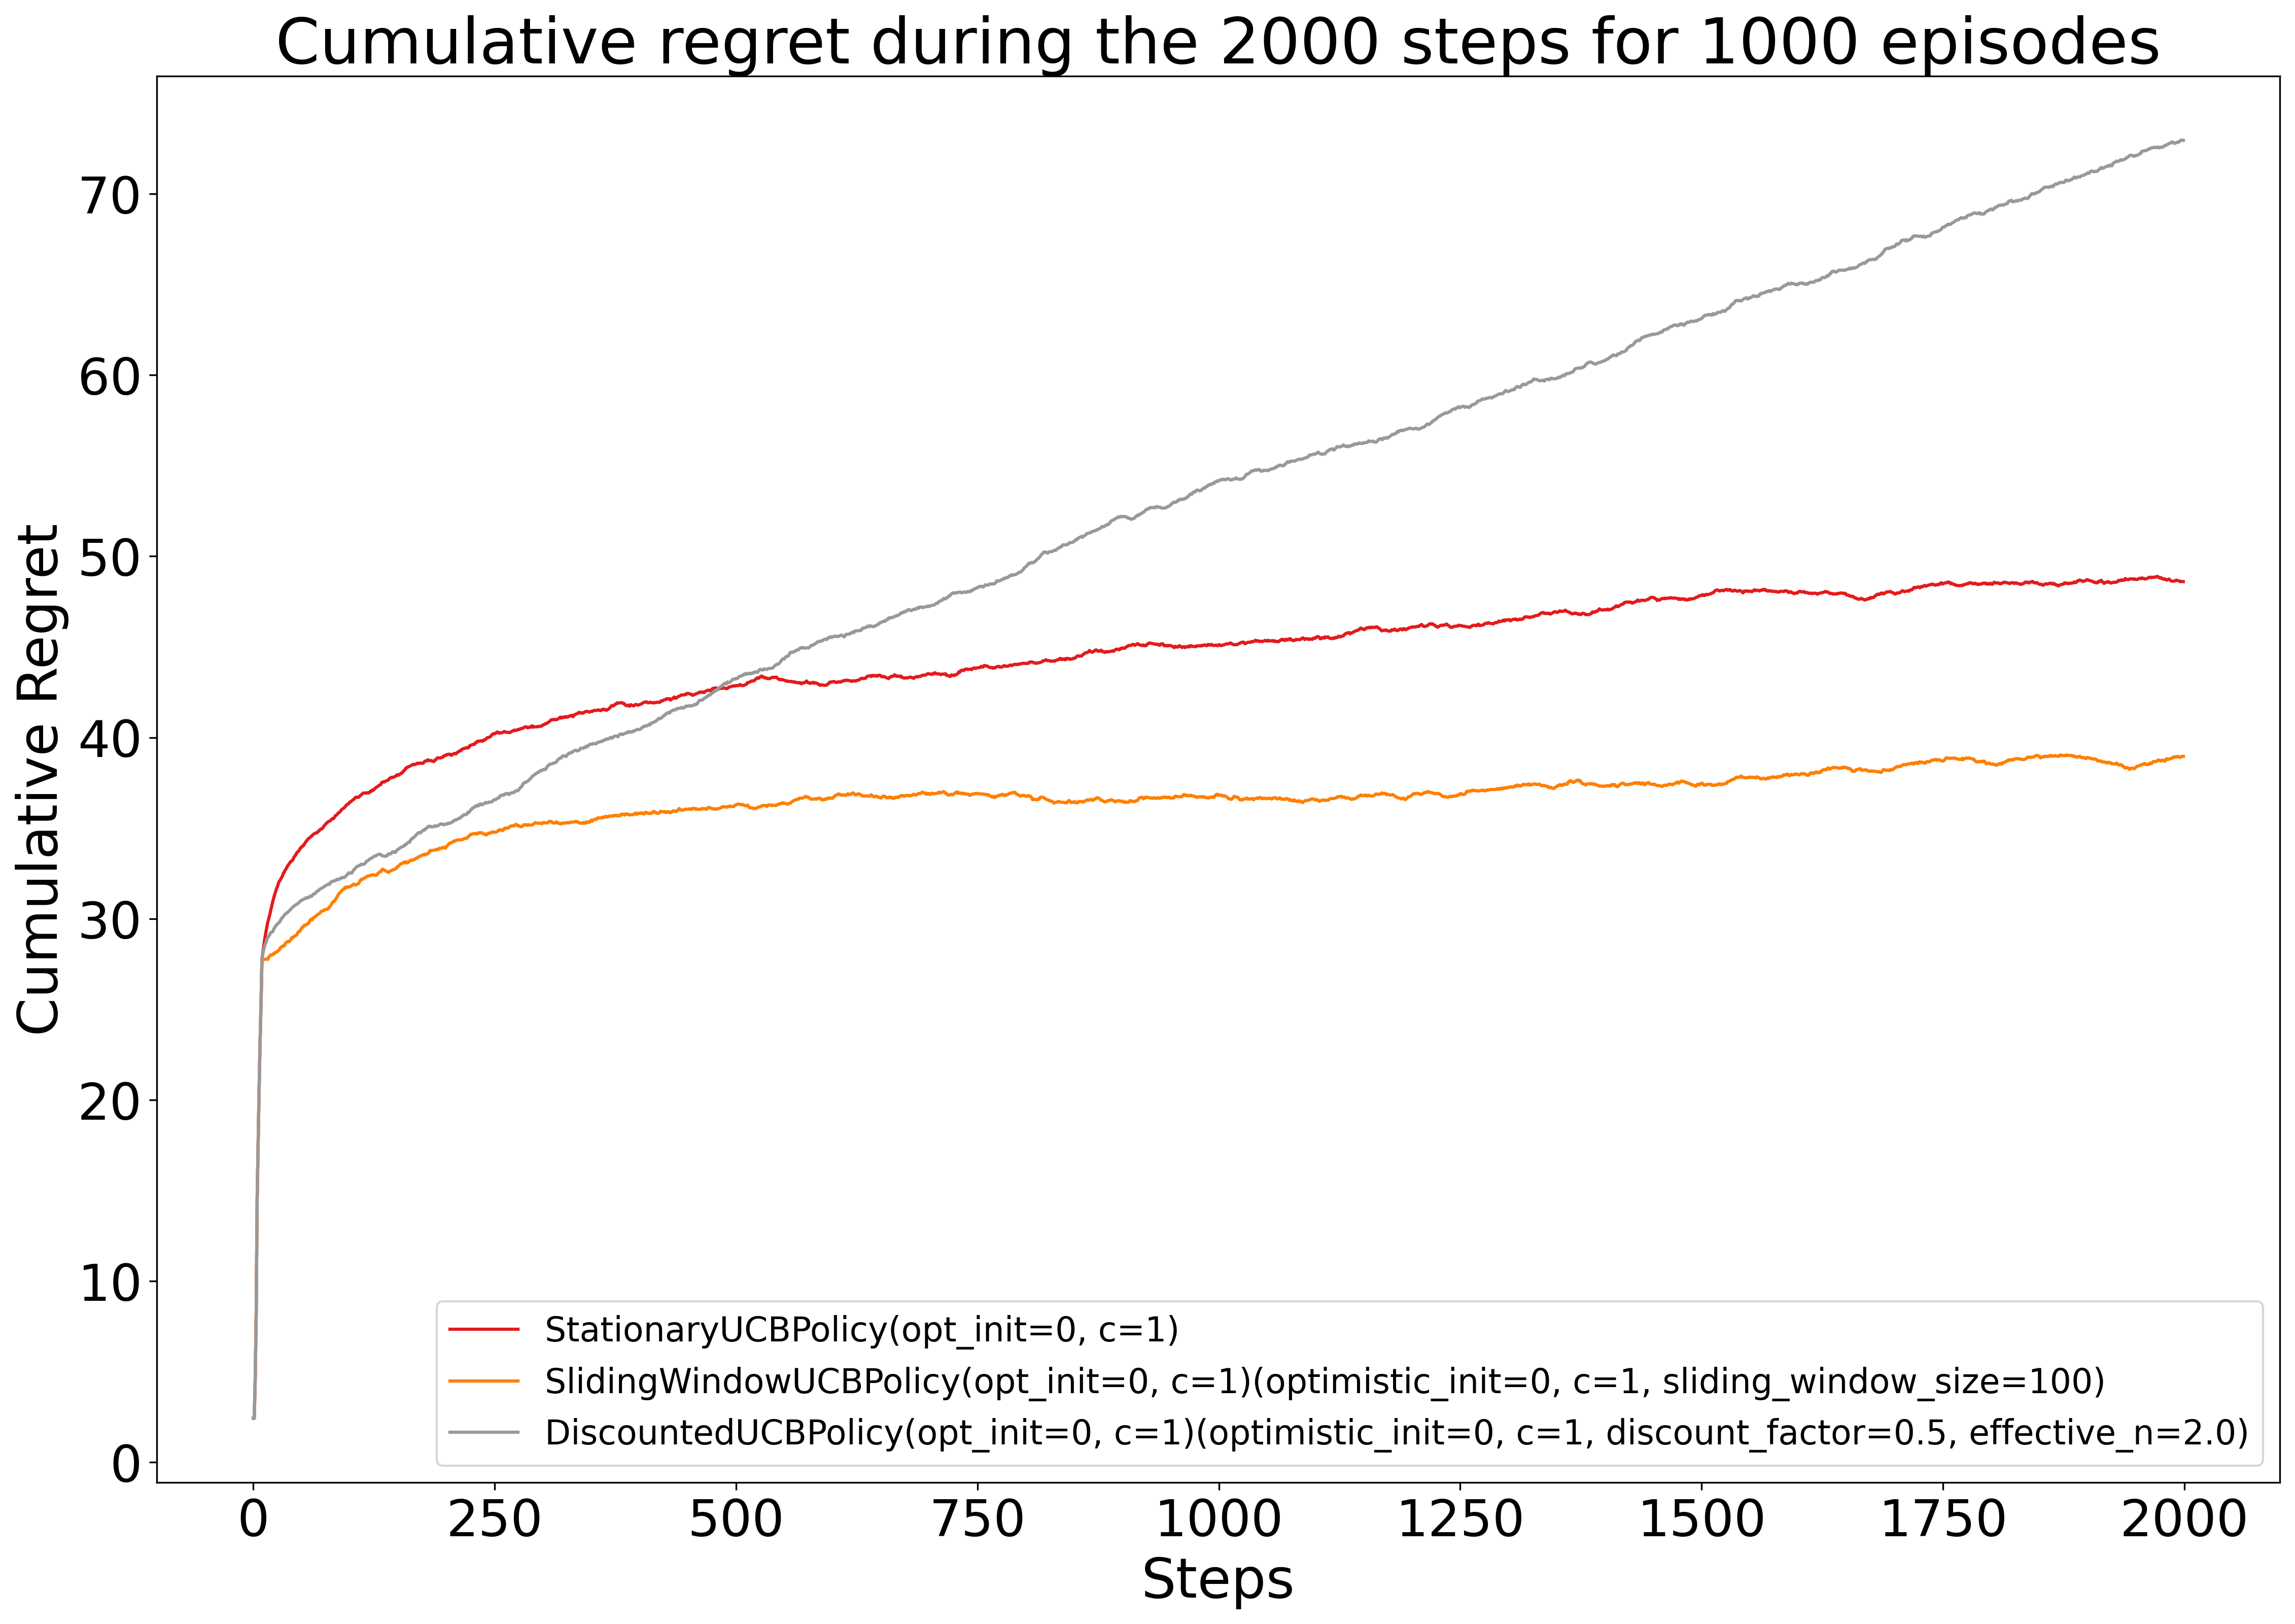

In [9]:
non_stationary_game.plot_cumulative_regret_by_step()

In [10]:
stationary_game = Game(
    n_episodes=100,
    n_steps=200,
    policies=[ucb_stationary_policy],
    n_bandits=10,
)

In [11]:
stationary_game.game_loop()

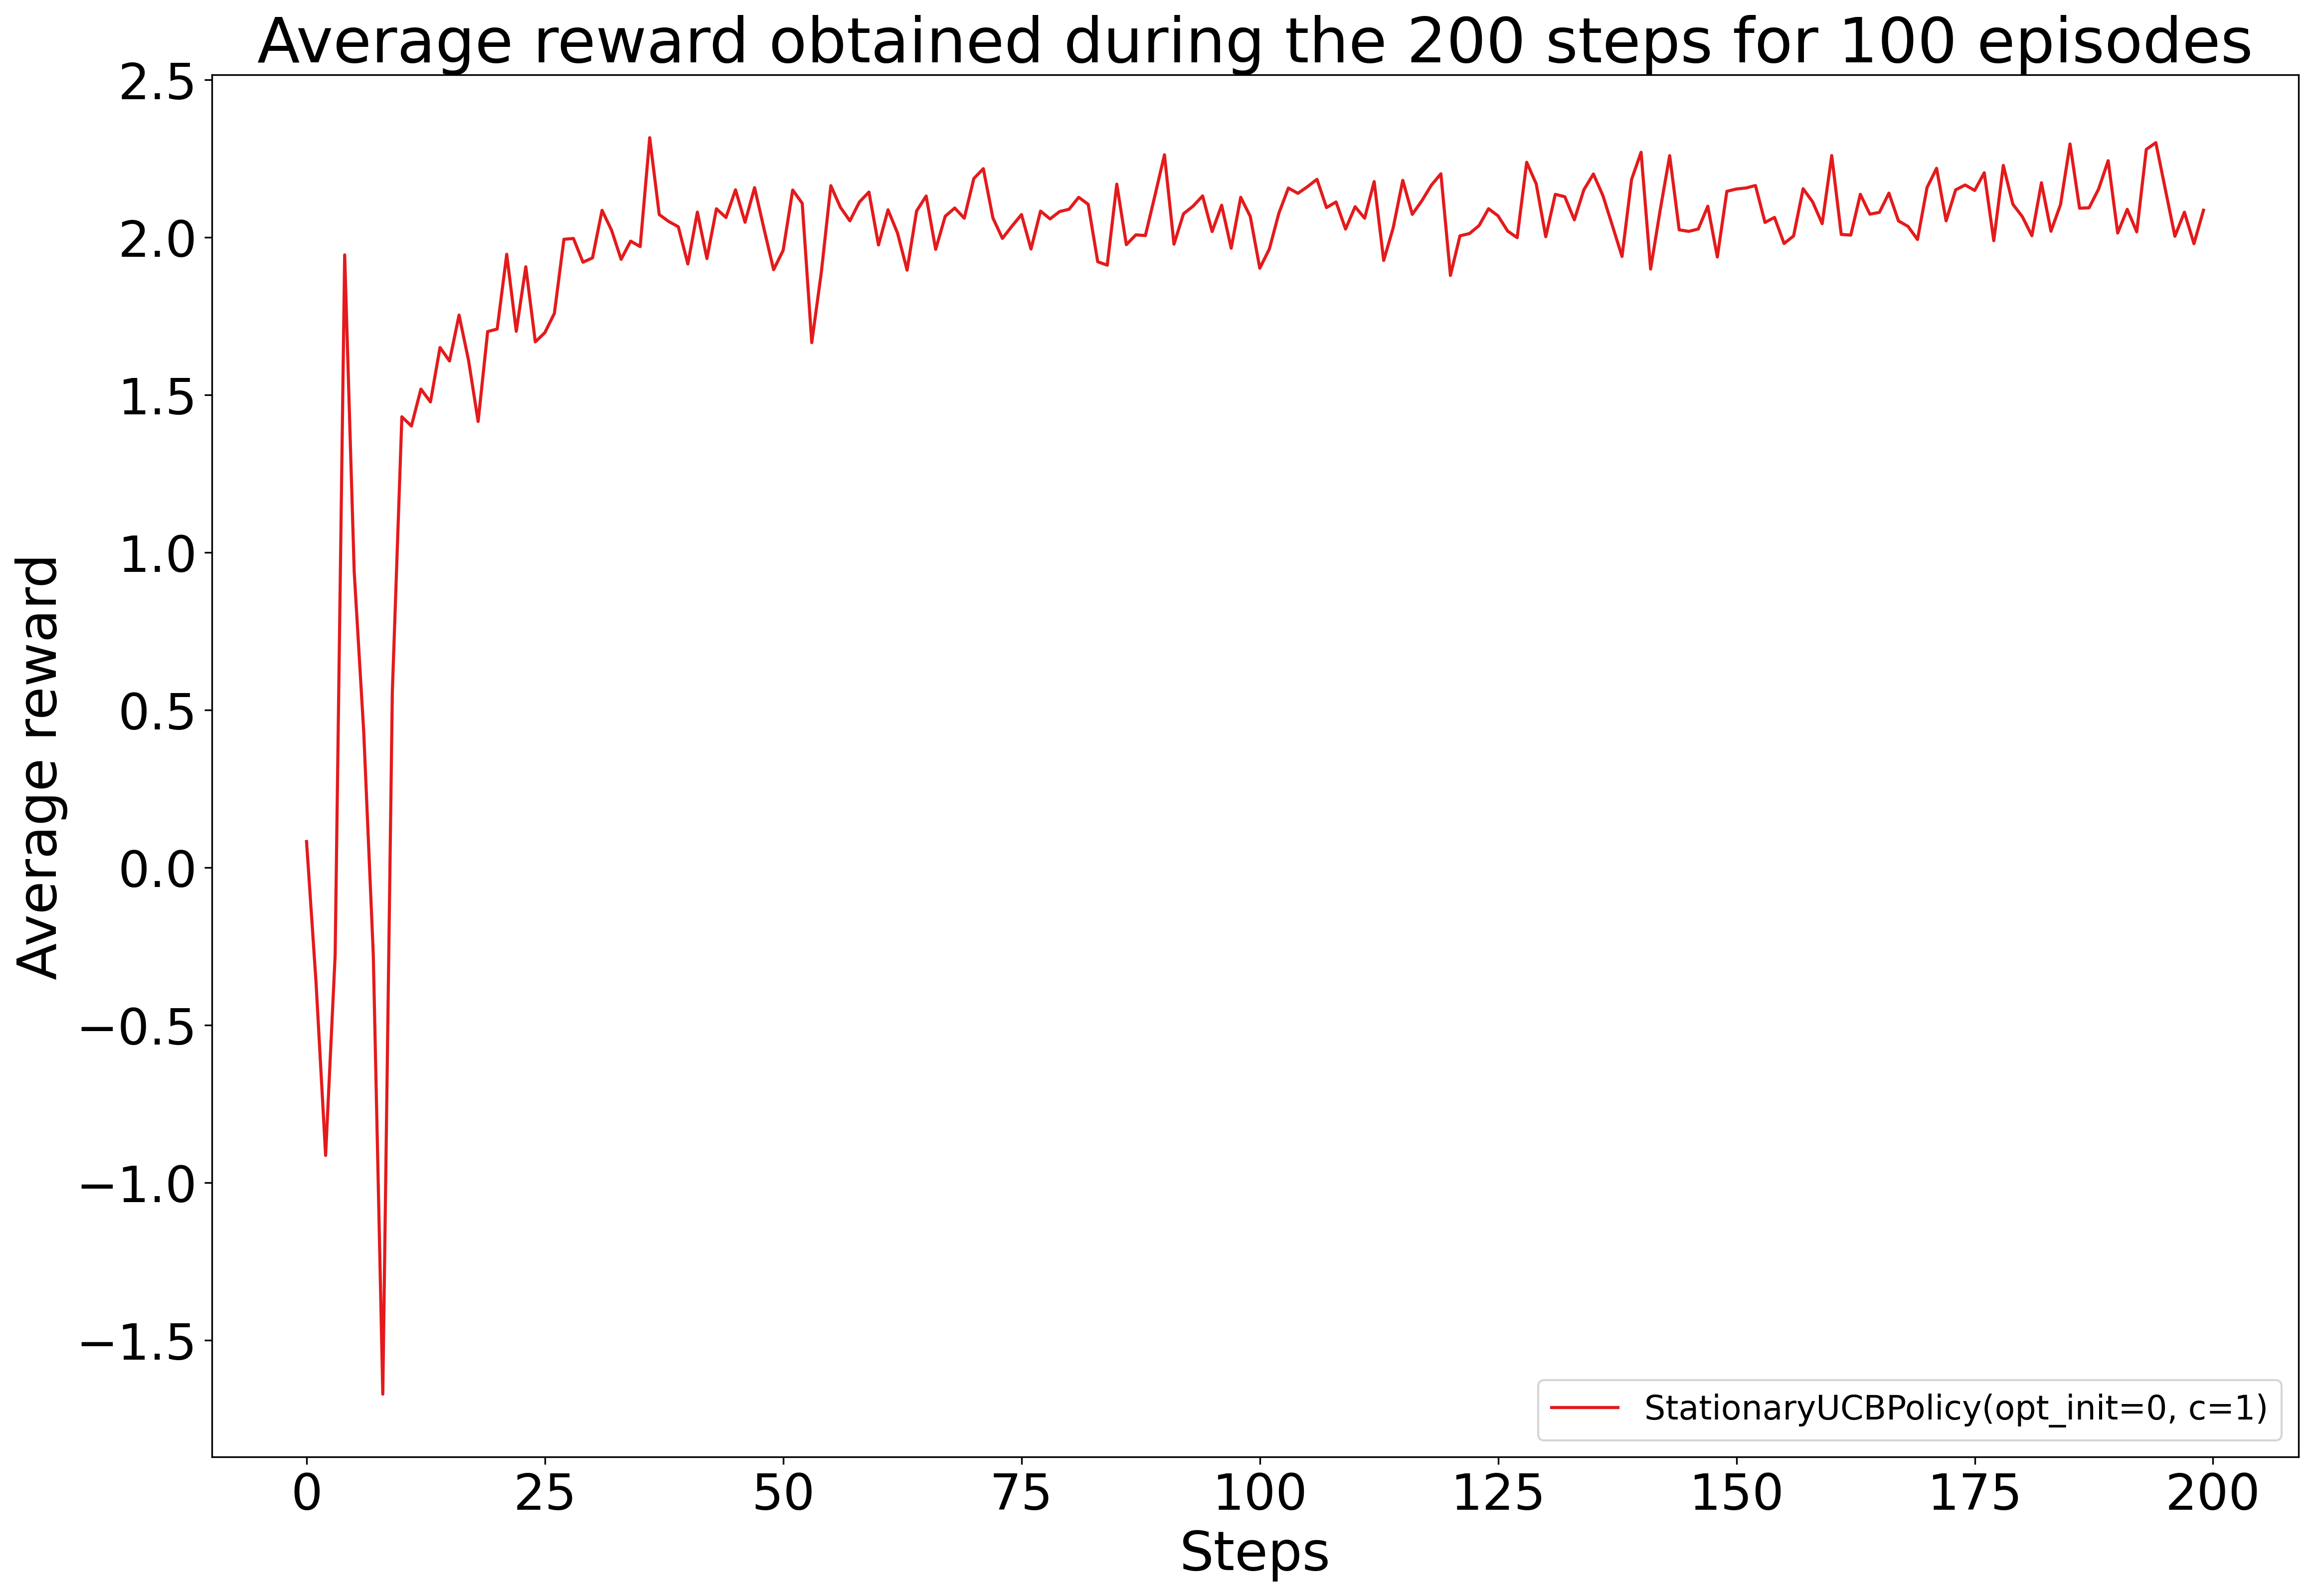

In [12]:
stationary_game.plot_average_reward_by_step()

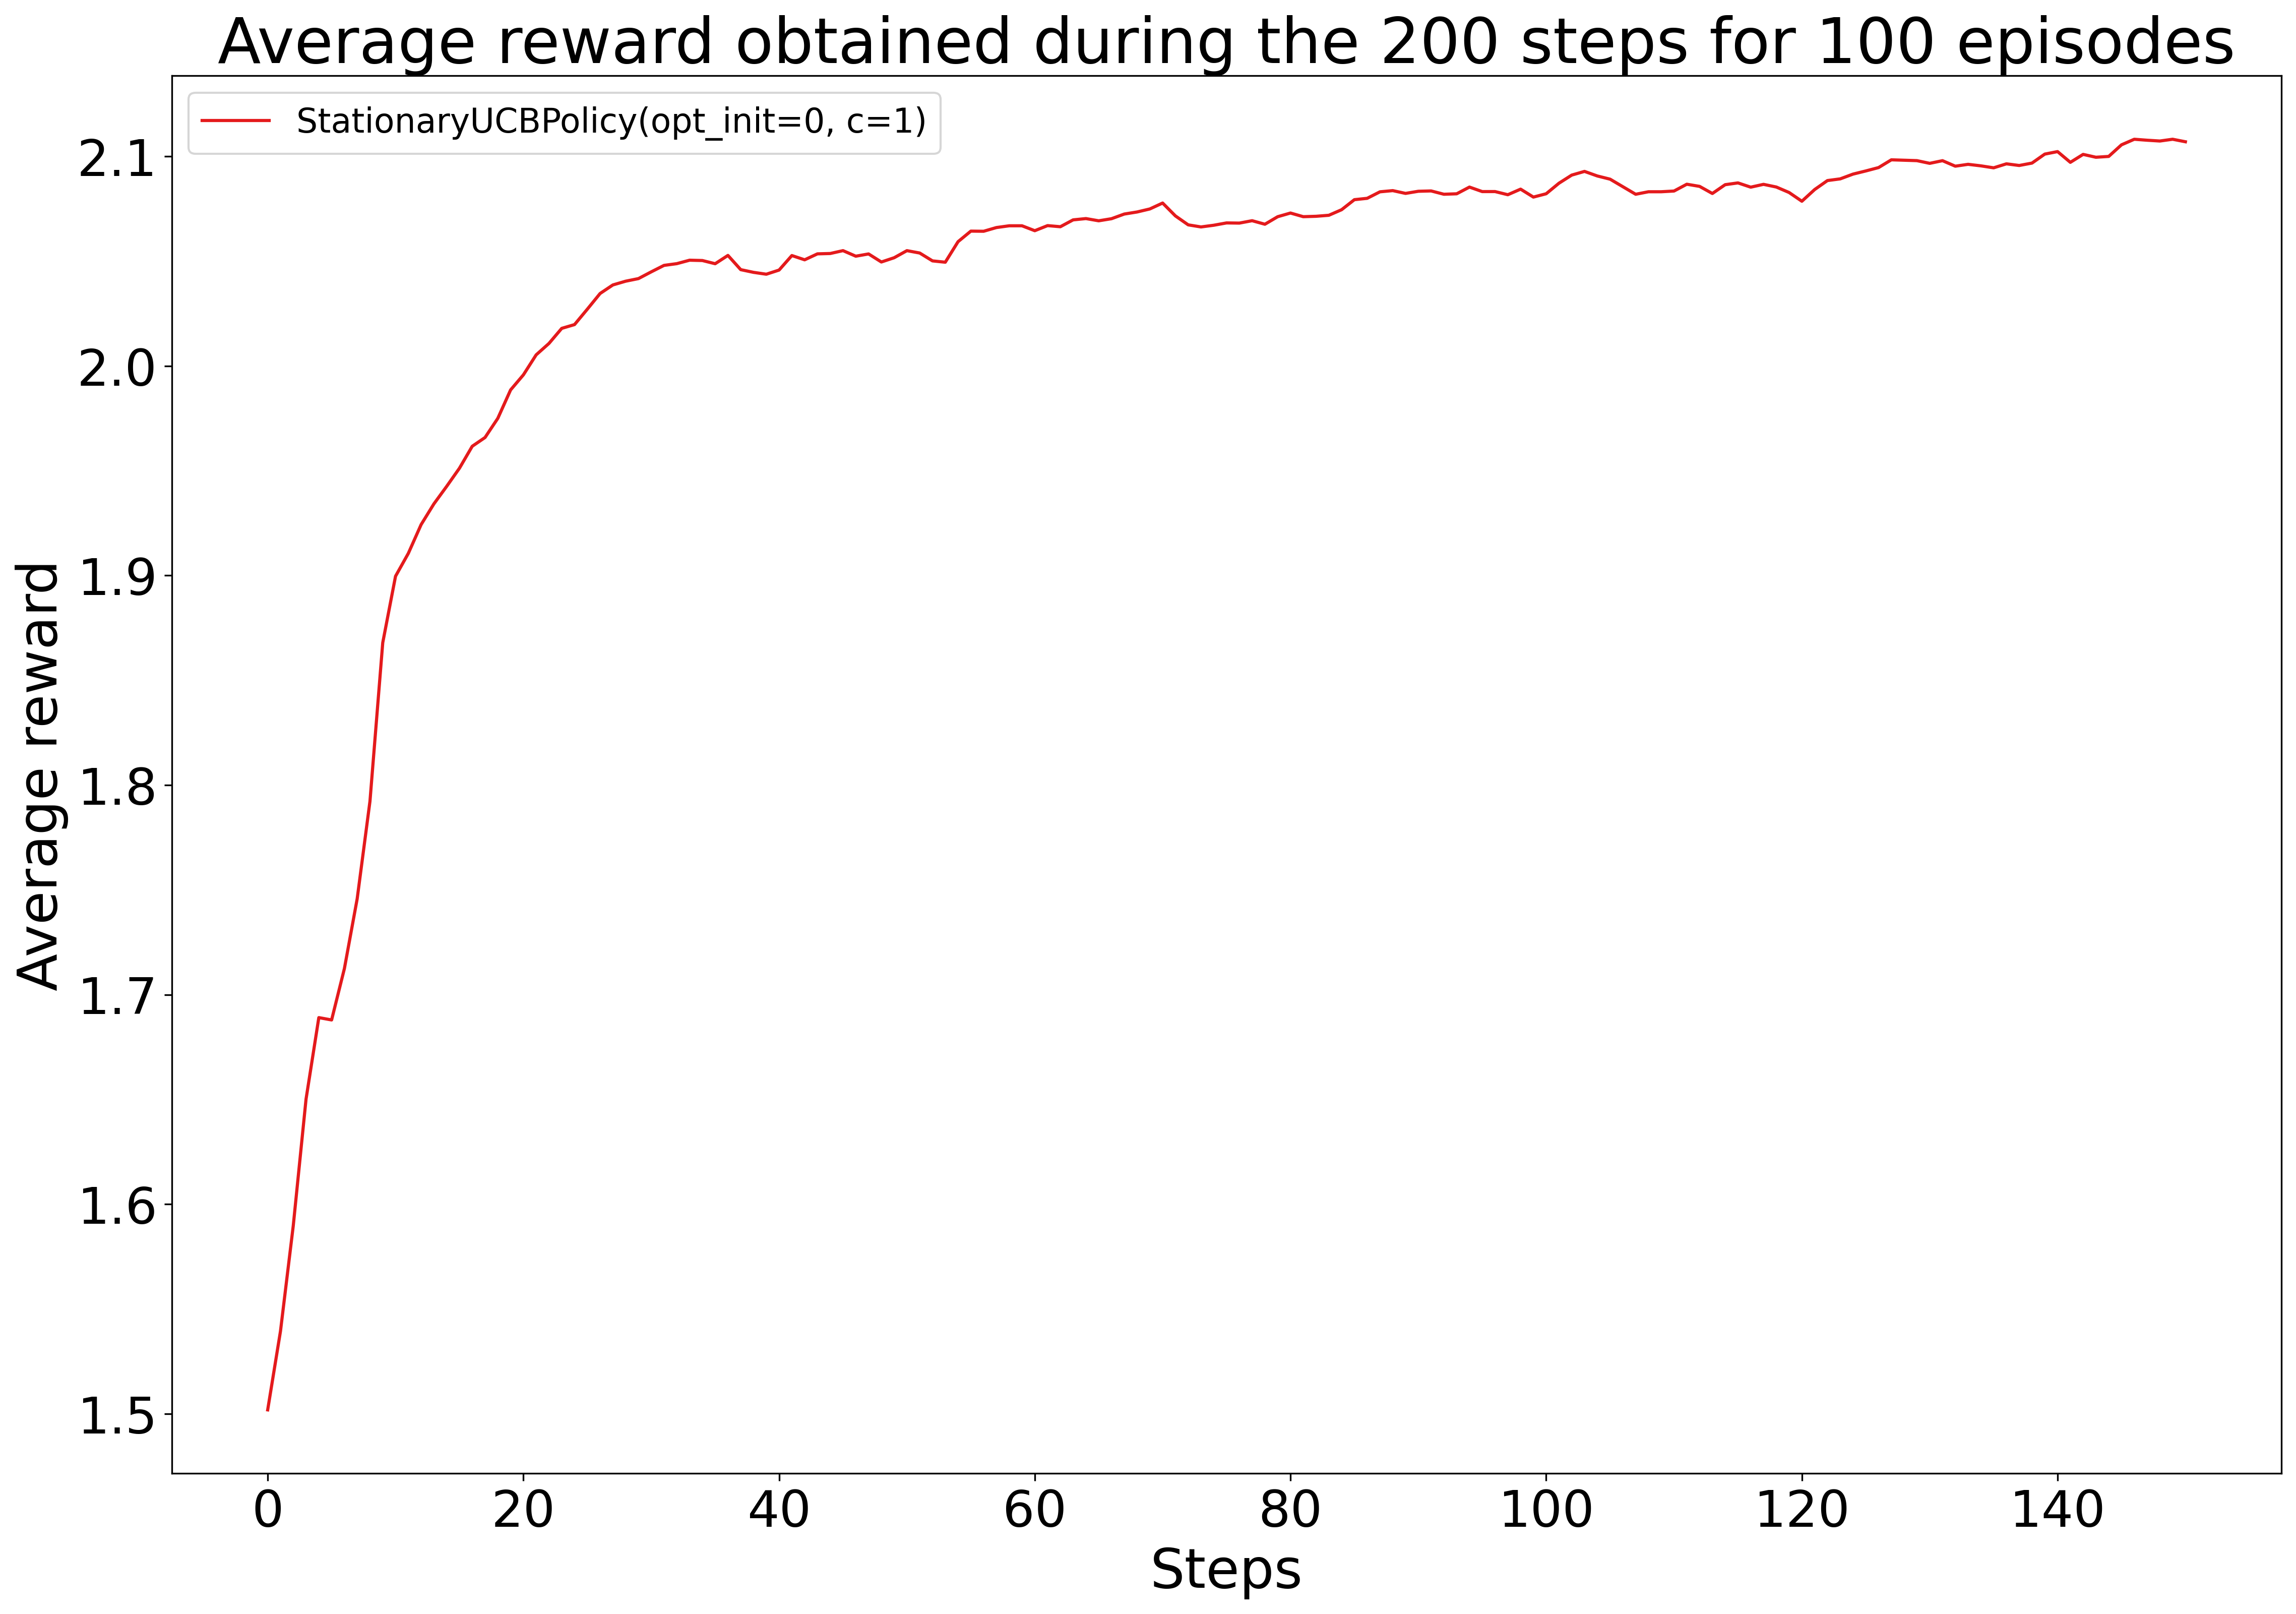

In [13]:
stationary_game.plot_average_reward_by_step_smoothed()

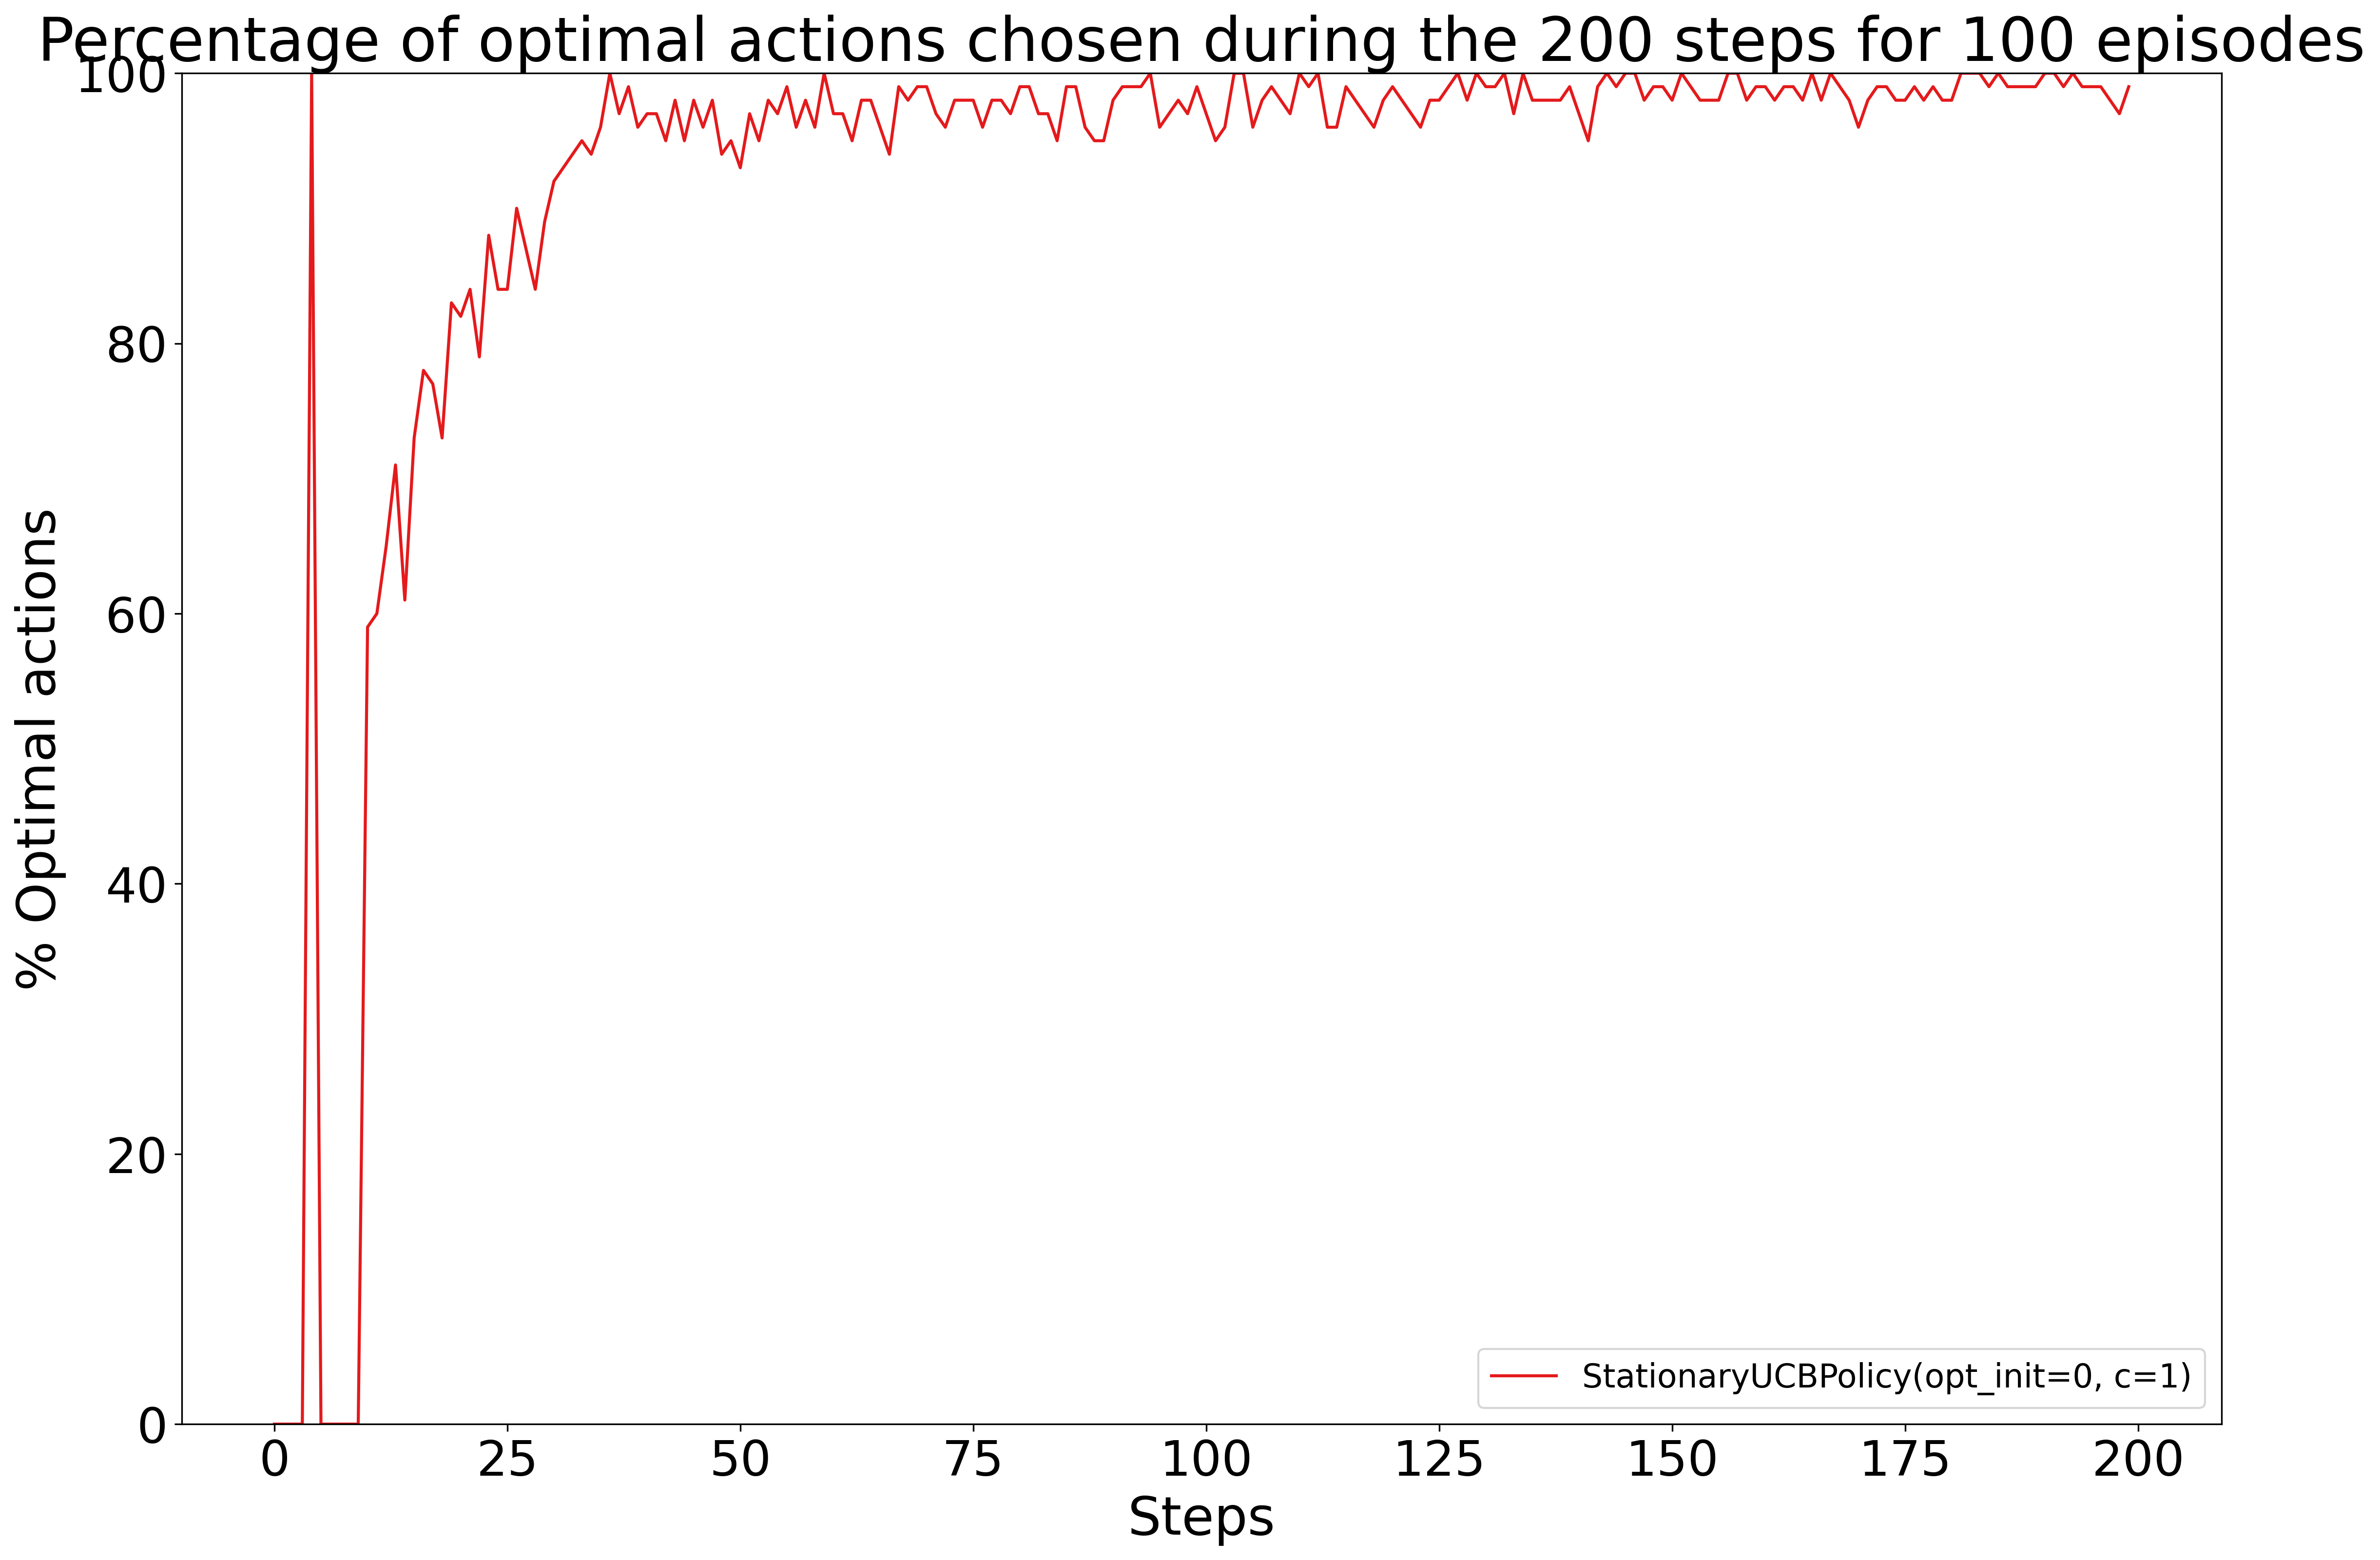

In [14]:
stationary_game.plot_rate_optimal_actions_by_step()

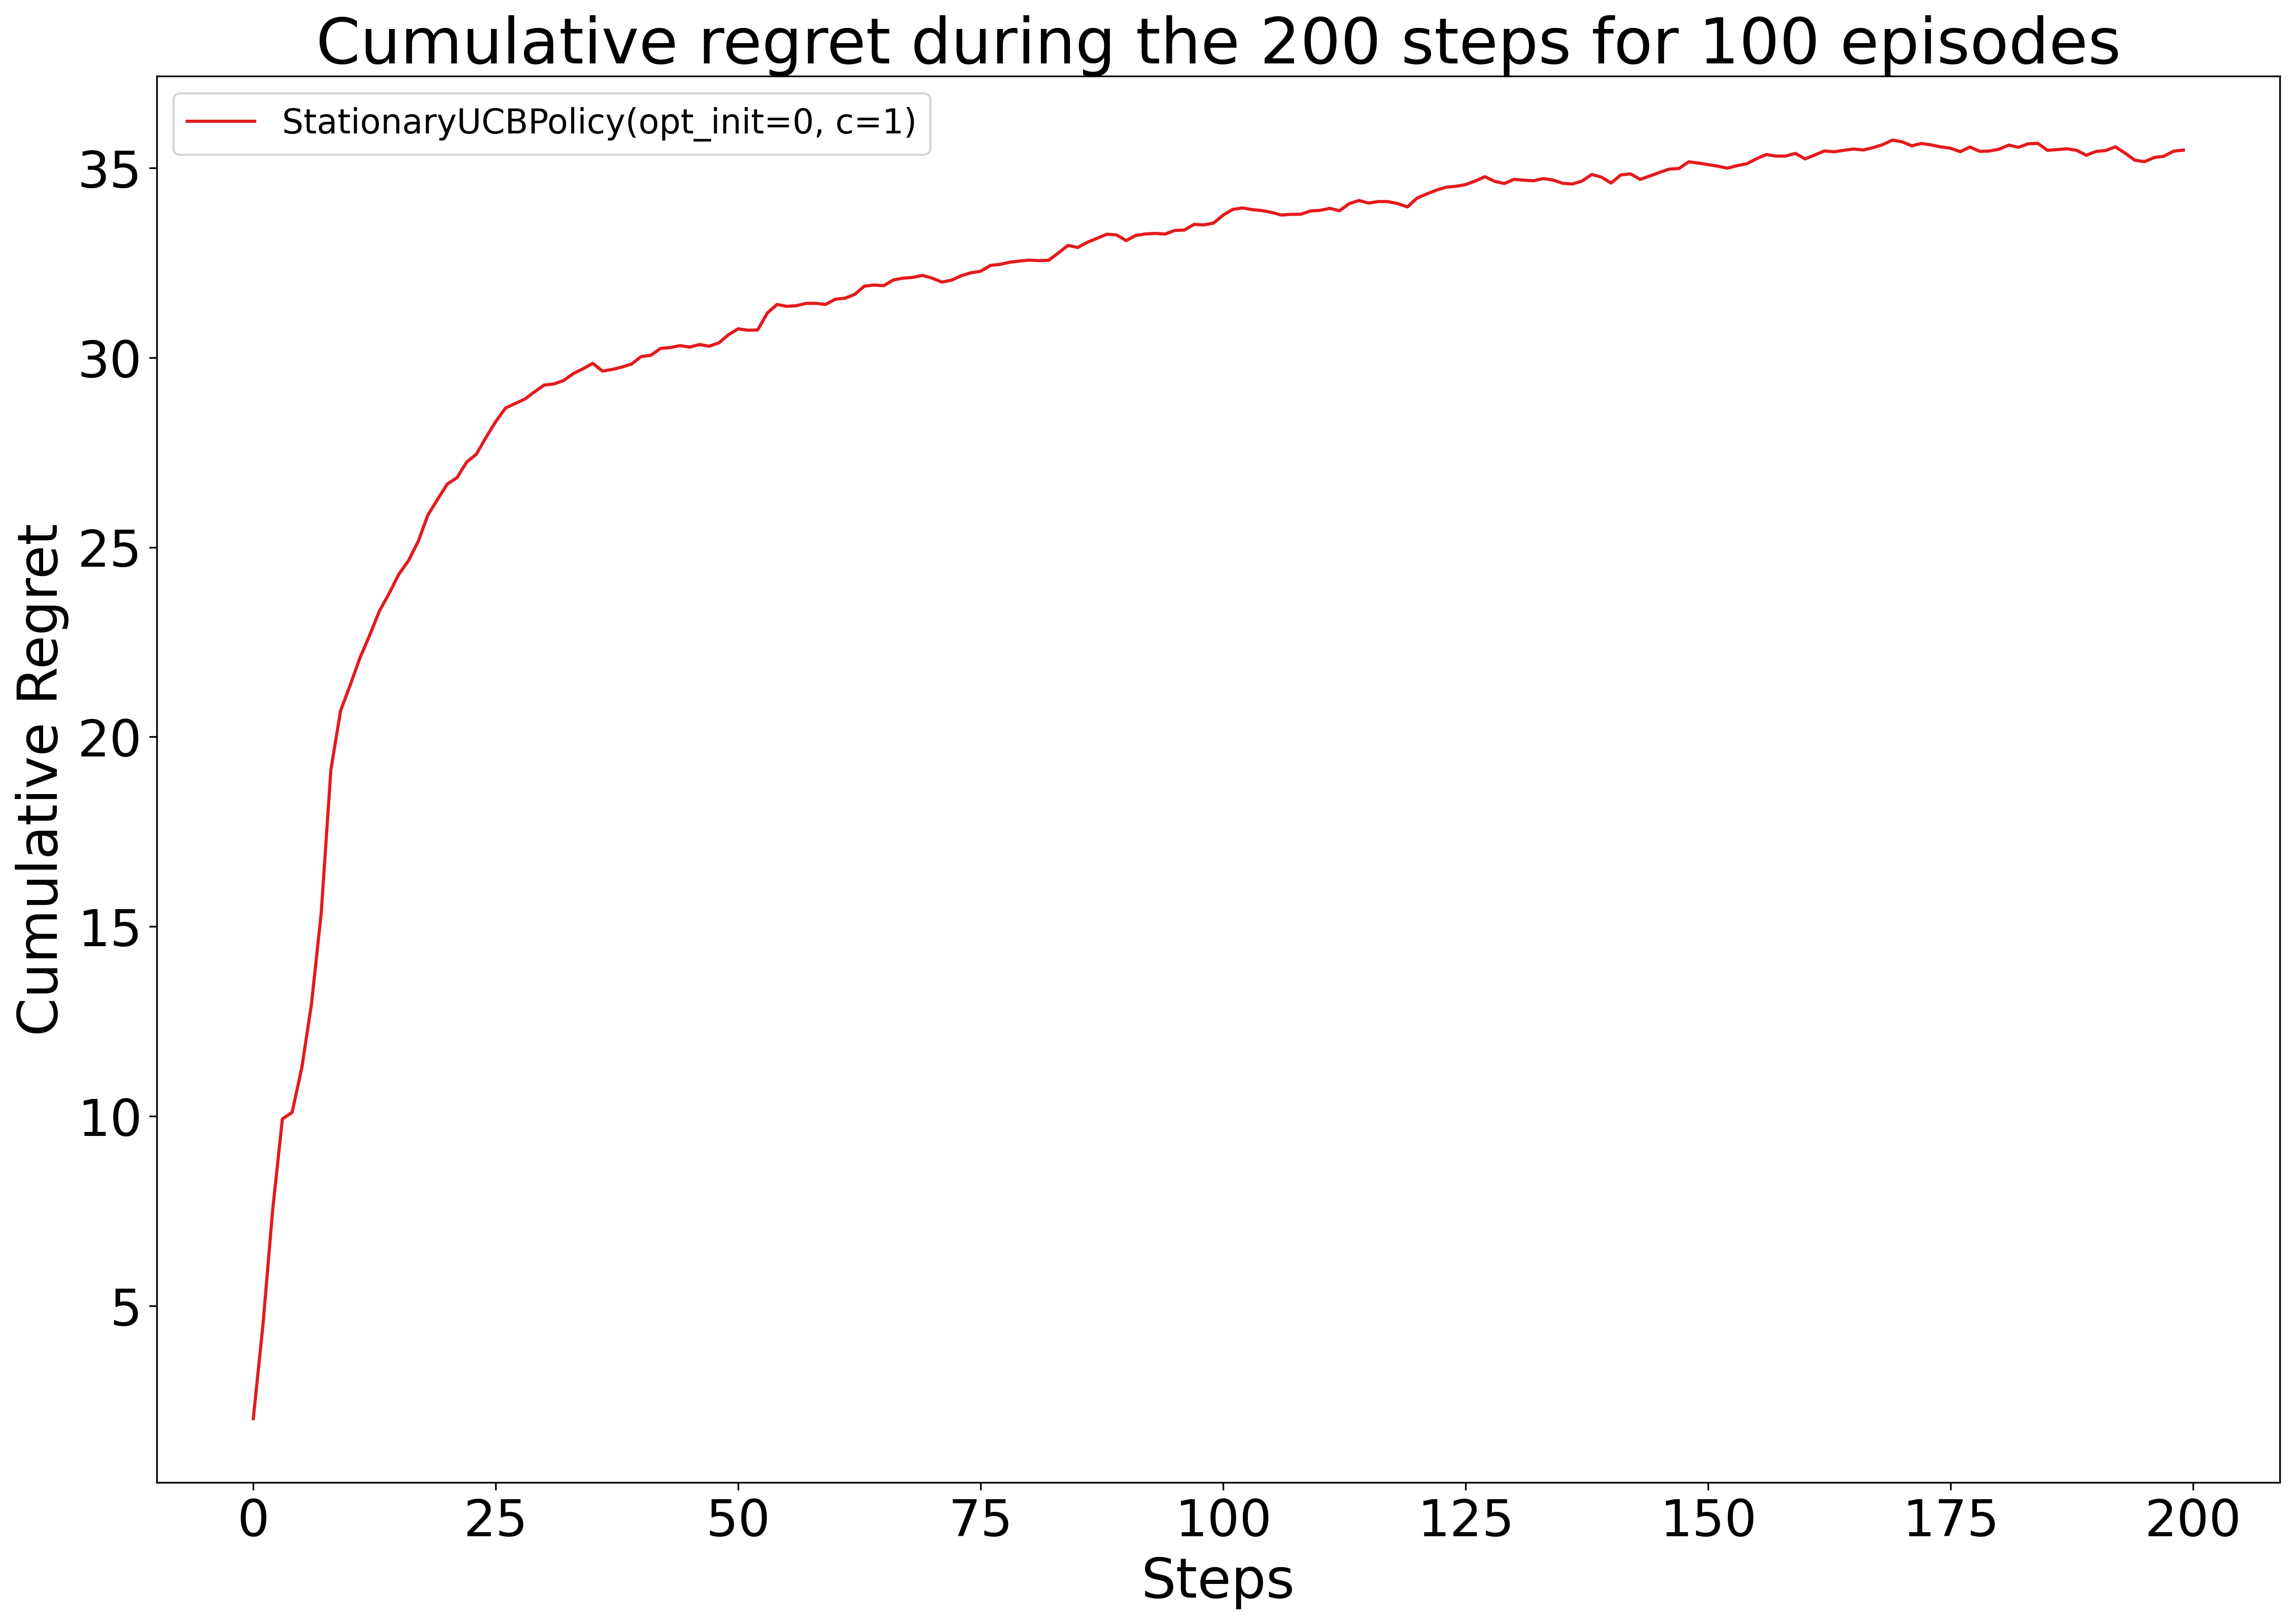

In [15]:
stationary_game.plot_cumulative_regret_by_step()

## Summary
### None Stationary Environment
In a non-stationary environment, the true underlying reward distributions of the arms change over time.

### Stationary Environment
In a stationary environment, the true underlying reward distributions of the arms do not change over time.
* Initially, it will explore all arms to build reliable estimates.
* Over time, it will concentrate more on the arms that appear to be better, but will still occasionally explore less promising arms.
* It has a good chance of converging to the optimal arm, even if initial estimates are noisy.